# Setup

In [54]:
# import your standard packages
%run pkgs.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [55]:
figpath = '../figures/'

## Read Data

In [56]:
# SLA
ds_SLA = xr.open_dataset('../data/sla_to_woa.nc')
# ds_SLA


In [57]:
# SLA
ds_SLA_ia = xr.open_dataset('../data/sla_to_wod.nc')
# ds_SLA_ia

In [58]:
# WOD
ds_WOD = xr.open_dataset('../data/wod_coastal_processed.nc')
# ds_WOD


In [59]:
# WOA
ds_WOA = xr.open_dataset('../data/woa_coastal_processed.nc')
ds_WOA

<xarray.Dataset>
Dimensions:                (month_eAS: 984, month_eBoB: 1632, month_wAS: 708, month_wBoB: 408)
Coordinates:
  * month_wAS              (month_wAS) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
  * month_eAS              (month_eAS) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
  * month_wBoB             (month_wBoB) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
  * month_eBoB             (month_eBoB) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
Data variables:
    lat_wAS                (month_wAS) float64 ...
    lon_wAS                (month_wAS) float64 ...
    mon_wAS                (month_wAS) float64 ...
    lat_eAS                (month_eAS) float64 ...
    lon_eAS                (month_eAS) float64 ...
    mon_eAS                (month_eAS) float64 ...
    lat_wBoB               (month_wBoB) float64 ...
    lon_wBoB               (month_wBoB) float64 ...
    mon_wBoB               (month_wBoB) float64 ...
    lat_eBoB               (month_eBoB) float64 ...
    lon_eBoB               (mon

# Oxygen vs SLA

1.9673174158181101e-25 0.5940852996494776
1.967317415818337e-25 0.5940852996494772
5.33522537986151e-88 0.6034162813727699
5.335225379860729e-88 0.6034162813727699
3.1025591388984195e-15 0.4600858013263962
3.10255913889839e-15 0.4600858013263963
6.275992275380213e-24 0.3001929261004623
6.275992275372038e-24 0.3001929261004624
2.7353008821255516e-22 0.6019707991354927
2.7353008821258577e-22 0.6019707991354927
4.98596144114121e-44 0.4749907888995361
4.985961441141623e-44 0.47499078889953594
1.2729079439011074e-17 0.7872198979765879
1.2729079439010154e-17 0.7872198979765883
4.740409423709913e-23 0.5299444119773802
4.740409423708784e-23 0.5299444119773804


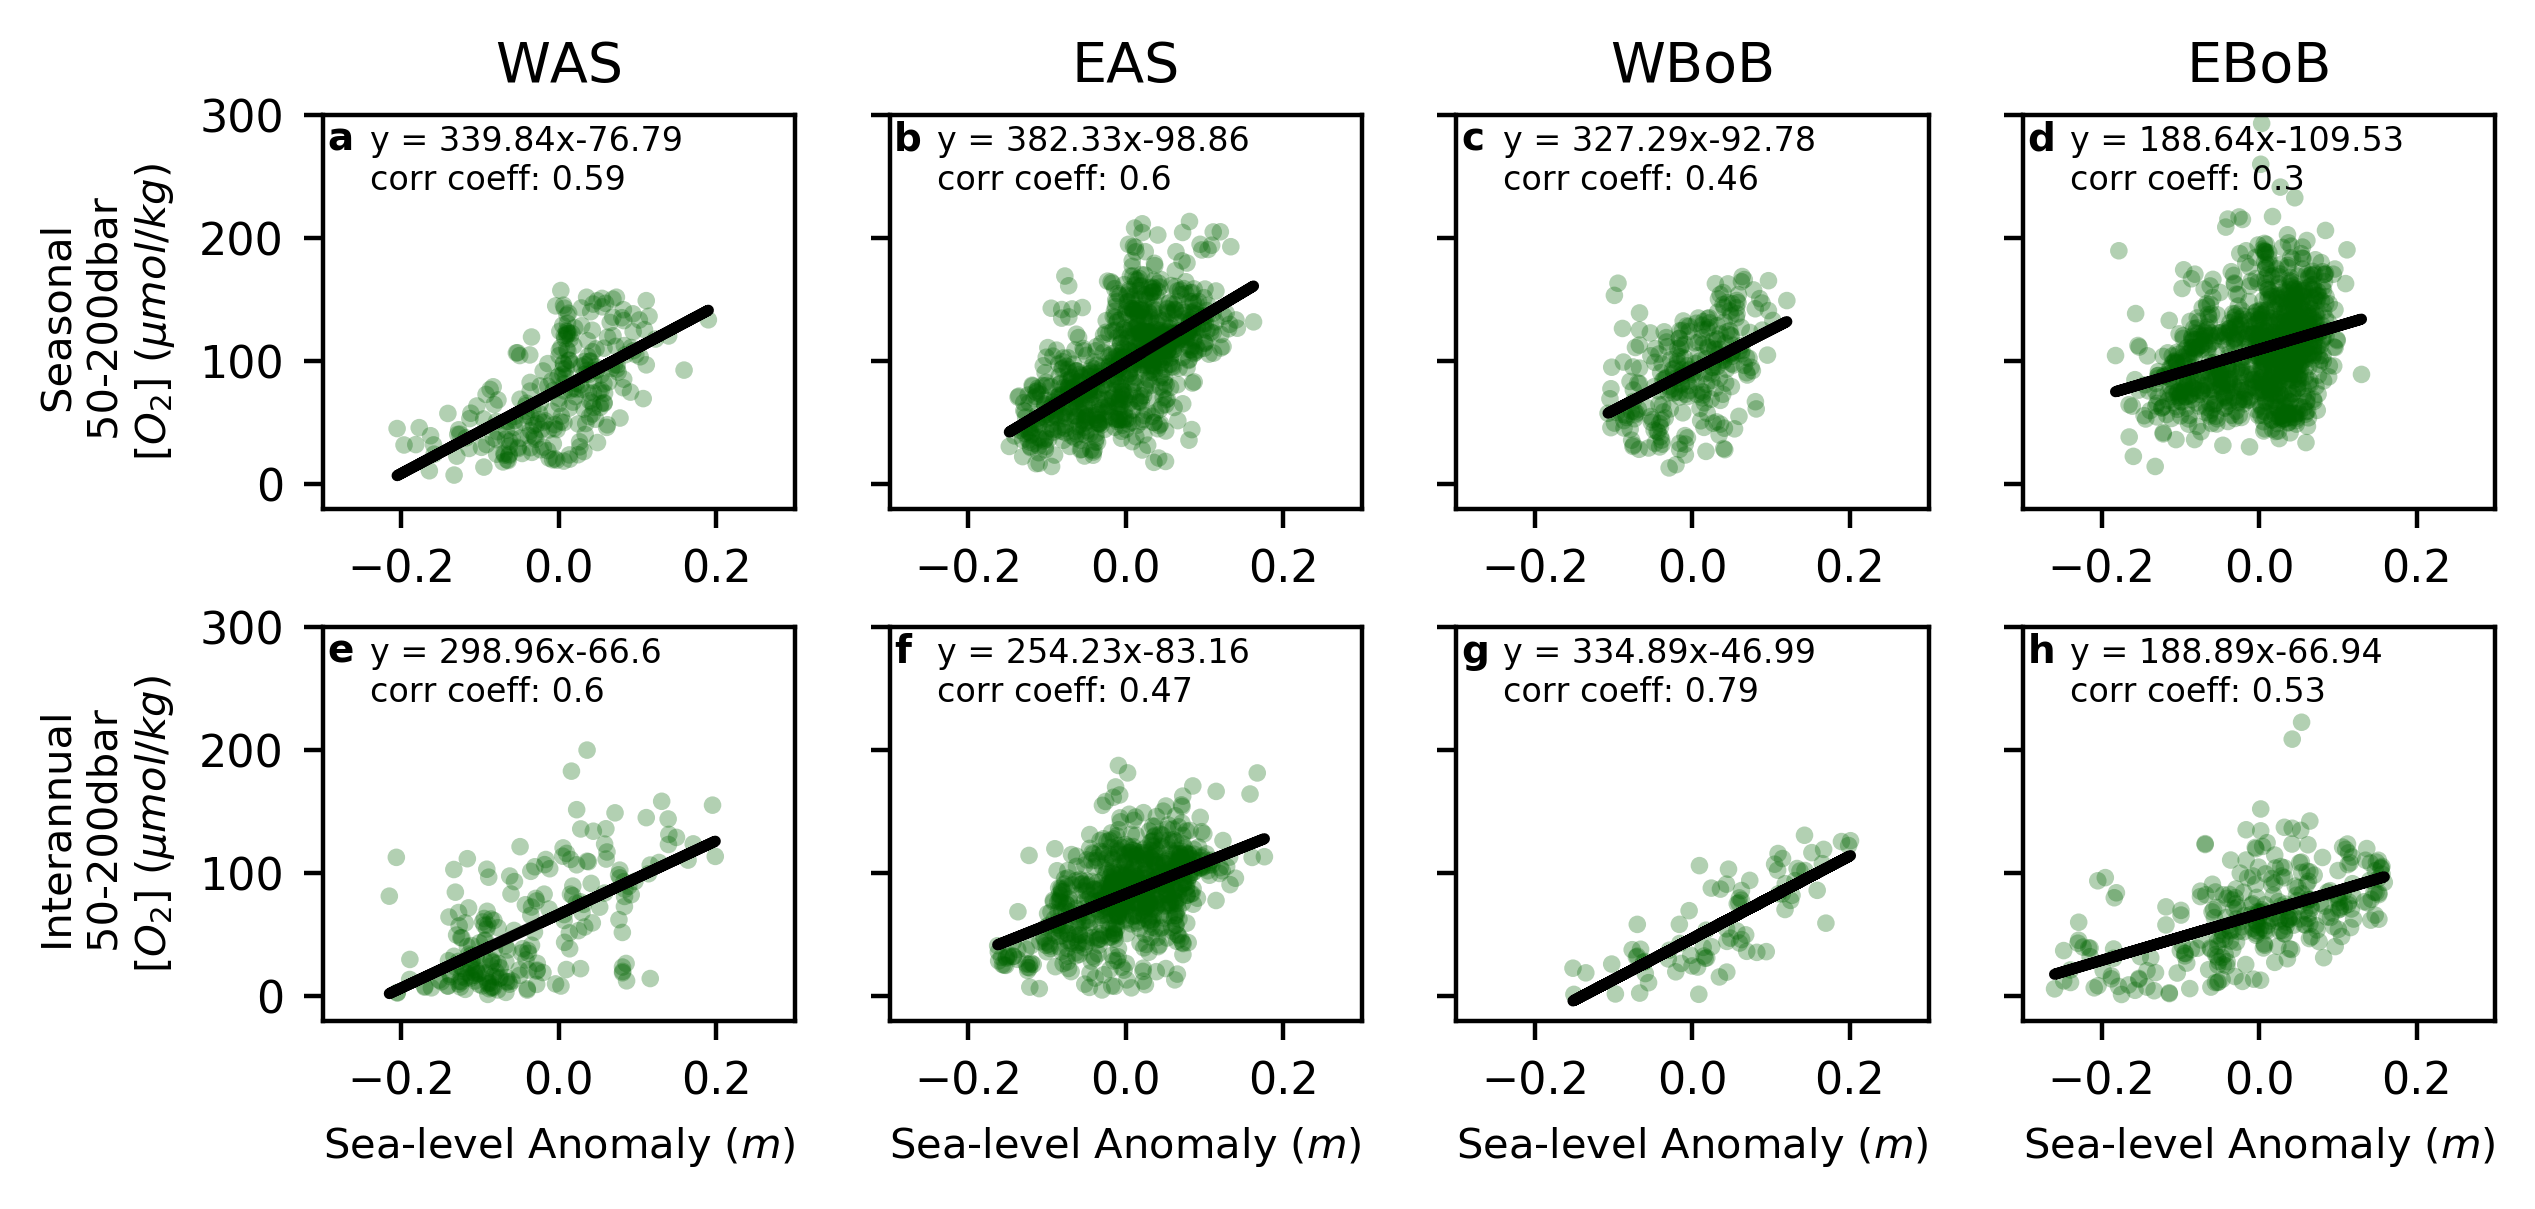

In [73]:
depth = '50_200'
Depth = '50-200'

doxy_wAS = ds_WOA['doxy_wAS_' + depth]
doxy_eAS = ds_WOA['doxy_eAS_' + depth]
doxy_wBoB = ds_WOA['doxy_wBoB_' + depth]
doxy_eBoB = ds_WOA['doxy_eBoB_' + depth]

sla_wAS = ds_SLA['sla_wAS']
sla_eAS = ds_SLA['sla_eAS']
sla_wBoB = ds_SLA['sla_wBoB']
sla_eBoB = ds_SLA['sla_eBoB']

doxy_wAS_ia = ds_WOD['doxy_wAS_' + depth]
doxy_eAS_ia = ds_WOD['doxy_eAS_' + depth]
doxy_wBoB_ia = ds_WOD['doxy_wBoB_' + depth]
doxy_eBoB_ia = ds_WOD['doxy_eBoB_' + depth]

sla_wAS_ia = ds_SLA_ia['sla_wAS']
sla_eAS_ia = ds_SLA_ia['sla_eAS']
sla_wBoB_ia = ds_SLA_ia['sla_wBoB']
sla_eBoB_ia = ds_SLA_ia['sla_eBoB']

##############################################################
fig = plt.figure(figsize=(17.8 / 2.54,3),dpi=400)

sz = 10
fsz = 6
lfz = 7
lw = 2
alpha = 0.3


xlim = [-0.3,0.3]
ylim = [-20,300]

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
cmap = plt.cm.viridis

sp_clr = 'darkgreen'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 8,
         'axes.labelsize': 7.5,
         'axes.titlesize': 10,
         'xtick.labelsize':8,
         'ytick.labelsize':8}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(241)
ind = np.isnan(sla_wAS) | np.isnan(doxy_wAS)
p = ax.scatter(sla_wAS[~ind],doxy_wAS[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ = stats.linregress(sla_wAS[~ind],doxy_wAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS[~ind],doxy_wAS[~ind])
print(p_val,r)
ax.plot(sla_wAS[~ind], m*sla_wAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('WAS')
ax.set_ylabel('Seasonal \n' + Depth + 'dbar \n[$O_2$] ($\mu mol/ kg$)')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'a', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
      
ax = fig.add_subplot(242)
ind = np.isnan(sla_eAS) | np.isnan(doxy_eAS)
p = ax.scatter(sla_eAS[~ind],doxy_eAS[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ = stats.linregress(sla_eAS[~ind],doxy_eAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS[~ind],doxy_eAS[~ind])
print(p_val,r)
ax.plot(sla_eAS[~ind], m*sla_eAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EAS')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'b', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
   
ax = fig.add_subplot(243)
ind = np.isnan(sla_wBoB) | np.isnan(doxy_wBoB)
p = ax.scatter(sla_wBoB[~ind],doxy_wBoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ =stats.linregress(sla_wBoB[~ind],doxy_wBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB[~ind],doxy_wBoB[~ind])
print(p_val,r)
ax.plot(sla_wBoB[~ind], m*sla_wBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('WBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
    
ax = fig.add_subplot(244)
ind = np.isnan(sla_eBoB) | np.isnan(doxy_eBoB)
p = ax.scatter(sla_eBoB[~ind],doxy_eBoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ =stats.linregress(sla_eBoB[~ind],doxy_eBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB[~ind],doxy_eBoB[~ind])
print(p_val,r)
ax.plot(sla_eBoB[~ind], m*sla_eBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'd', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
   
#-------------------------------------------------------------

ax = fig.add_subplot(245)
ind = np.isnan(sla_wAS_ia) | np.isnan(doxy_wAS_ia)
ax.scatter(sla_wAS_ia[~ind],doxy_wAS_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ =stats.linregress(sla_wAS_ia[~ind], doxy_wAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS_ia[~ind],doxy_wAS_ia[~ind])
print(p_val,r)
ax.plot(sla_wAS_ia[~ind], m*sla_wAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('Interannual \n' + Depth + 'dbar \n[$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'e', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
    
ax = fig.add_subplot(246)
ind = np.isnan(sla_eAS_ia) | np.isnan(doxy_eAS_ia)
ax.scatter(sla_eAS_ia[~ind],doxy_eAS_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ =stats.linregress(sla_eAS_ia[~ind], doxy_eAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS_ia[~ind],doxy_eAS_ia[~ind])
print(p_val,r)
ax.plot(sla_eAS_ia[~ind], m*sla_eAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'f', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
   
ax = fig.add_subplot(247)
ind = np.isnan(sla_wBoB_ia) | np.isnan(doxy_wBoB_ia)
ax.scatter(sla_wBoB_ia[~ind],doxy_wBoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ =stats.linregress(sla_wBoB_ia[~ind], doxy_wBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB_ia[~ind],doxy_wBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_wBoB_ia[~ind], m*sla_wBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'g', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
   
ax = fig.add_subplot(248)
ind = np.isnan(sla_eBoB_ia) | np.isnan(doxy_eBoB_ia)
ax.scatter(sla_eBoB_ia[~ind],doxy_eBoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'gray',linestyle = '--', linewidth = 0.5)
m, b, r, p_val,_ =stats.linregress(sla_eBoB_ia[~ind], doxy_eBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB_ia[~ind],doxy_eBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_eBoB_ia[~ind], m*sla_eBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'h', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
      
plt.subplots_adjust(hspace = 0.3)

plt.savefig(figpath + 'doxy_sla_corr_' + depth + '.pdf', format='pdf', dpi = 400)


# Temperature vs SLA

1.5450933704012504e-52 0.778730712161666
1.5450933704014212e-52 0.7787307121616658
6.452864617581599e-174 0.7716270188150803
6.452864617578984e-174 0.7716270188150806
7.309148055357633e-27 0.5967883392424748
7.309148055357755e-27 0.5967883392424749
6.945239364659688e-53 0.4420576682637426
6.945239364651173e-53 0.4420576682637425
0.0 0.6283415773344081
0.0 0.628341577334408
0.0 0.48452374639339507
0.0 0.4845237463933953
1.873279522972081e-145 0.5842516944155673
1.8732795229721734e-145 0.5842516944155673
0.0 0.41244312003741057
0.0 0.4124431200374105


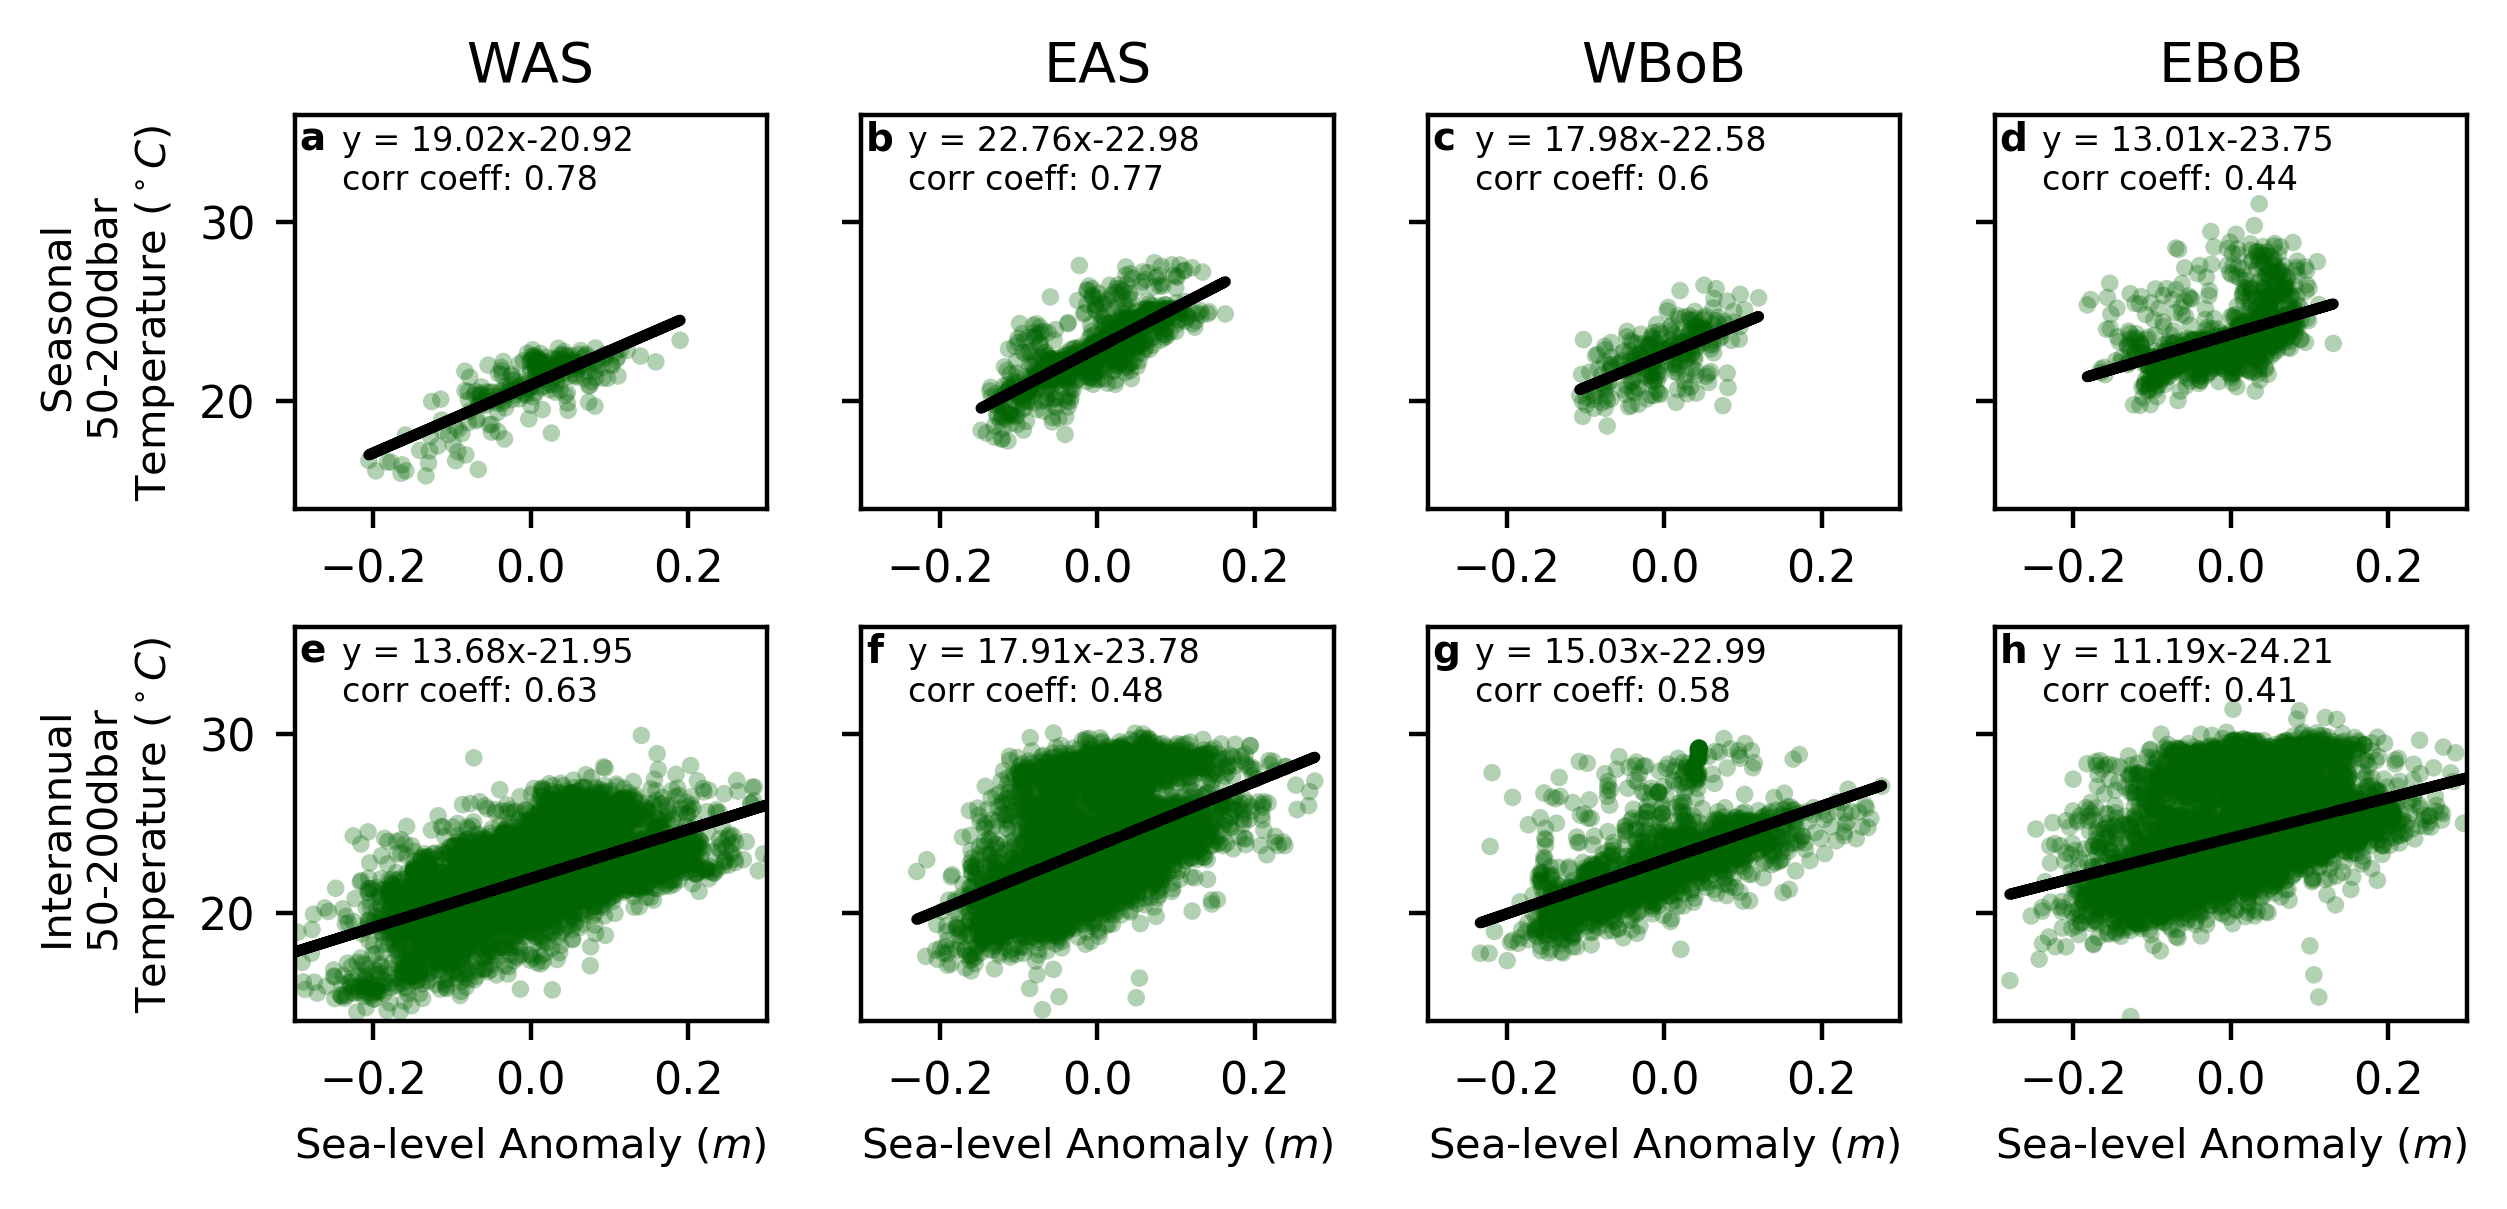

In [78]:
depth = '50_200'
Depth = '50-200'

temp_wAS = ds_WOA['temp_wAS_' + depth]
temp_eAS = ds_WOA['temp_eAS_' + depth]
temp_wBoB = ds_WOA['temp_wBoB_' + depth]
temp_eBoB = ds_WOA['temp_eBoB_' + depth]

sla_wAS = ds_SLA['sla_wAS']
sla_eAS = ds_SLA['sla_eAS']
sla_wBoB = ds_SLA['sla_wBoB']
sla_eBoB = ds_SLA['sla_eBoB']

temp_wAS_ia = ds_WOD['temp_wAS_' + depth]
temp_eAS_ia = ds_WOD['temp_eAS_' + depth]
temp_wBoB_ia = ds_WOD['temp_wBoB_' + depth]
temp_eBoB_ia = ds_WOD['temp_eBoB_' + depth]

sla_wAS_ia = ds_SLA_ia['sla_wAS']
sla_eAS_ia = ds_SLA_ia['sla_eAS']
sla_wBoB_ia = ds_SLA_ia['sla_wBoB']
sla_eBoB_ia = ds_SLA_ia['sla_eBoB']

##############################################################
fig = plt.figure(figsize=(17.8 / 2.54,3),dpi=400)

sz = 10
fsz = 6
lfz = 7
lw = 2
alpha = 0.3


xlim = [-0.3,0.3]
ylim = [14,36]

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
cmap = plt.cm.viridis

sp_clr = 'darkgreen'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 8,
         'axes.labelsize': 7.5,
         'axes.titlesize': 10,
         'xtick.labelsize':8,
         'ytick.labelsize':8}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(241)
ind = np.isnan(sla_wAS) | np.isnan(temp_wAS)
p = ax.scatter(sla_wAS[~ind],temp_wAS[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_wAS[~ind],temp_wAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS[~ind],temp_wAS[~ind])
print(p_val,r)
ax.plot(sla_wAS[~ind], m*sla_wAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('WAS')
ax.set_ylabel('Seasonal \n' + Depth + 'dbar \nTemperature ($^\circ C$)')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'a', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
    
ax = fig.add_subplot(242)
ind = np.isnan(sla_eAS) | np.isnan(temp_eAS)
p = ax.scatter(sla_eAS[~ind],temp_eAS[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_eAS[~ind],temp_eAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS[~ind],temp_eAS[~ind])
print(p_val,r)
ax.plot(sla_eAS[~ind], m*sla_eAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EAS')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'b', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
   
ax = fig.add_subplot(243)
ind = np.isnan(sla_wBoB) | np.isnan(temp_wBoB)
p = ax.scatter(sla_wBoB[~ind],temp_wBoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB[~ind],temp_wBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB[~ind],temp_wBoB[~ind])
print(p_val,r)
ax.plot(sla_wBoB[~ind], m*sla_wBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('WBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
  
ax = fig.add_subplot(244)
ind = np.isnan(sla_eBoB) | np.isnan(temp_eBoB)
p = ax.scatter(sla_eBoB[~ind],temp_eBoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eBoB[~ind],temp_eBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB[~ind],temp_eBoB[~ind])
print(p_val,r)
ax.plot(sla_eBoB[~ind], m*sla_eBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'd', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
  
#-------------------------------------------------------------

ax = fig.add_subplot(245)
ind = np.isnan(sla_wAS_ia) | np.isnan(temp_wAS_ia)
ax.scatter(sla_wAS_ia[~ind],temp_wAS_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wAS_ia[~ind], temp_wAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS_ia[~ind],temp_wAS_ia[~ind])
print(p_val,r)
ax.plot(sla_wAS_ia[~ind], m*sla_wAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('Interannual \n' + Depth + 'dbar \nTemperature ($^\circ C$)')
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'e', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
    
ax = fig.add_subplot(246)
ind = np.isnan(sla_eAS_ia) | np.isnan(temp_eAS_ia)
ax.scatter(sla_eAS_ia[~ind],temp_eAS_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eAS_ia[~ind], temp_eAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS_ia[~ind],temp_eAS_ia[~ind])
print(p_val,r)
ax.plot(sla_eAS_ia[~ind], m*sla_eAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'f', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
    
ax = fig.add_subplot(247)
ind = np.isnan(sla_wBoB_ia) | np.isnan(temp_wBoB_ia)
ax.scatter(sla_wBoB_ia[~ind],temp_wBoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB_ia[~ind], temp_wBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB_ia[~ind],temp_wBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_wBoB_ia[~ind], m*sla_wBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'g', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
    
ax = fig.add_subplot(248)
ind = np.isnan(sla_eBoB_ia) | np.isnan(temp_eBoB_ia)
ax.scatter(sla_eBoB_ia[~ind],temp_eBoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eBoB_ia[~ind], temp_eBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB_ia[~ind],temp_eBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_eBoB_ia[~ind], m*sla_eBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'h', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
    
plt.subplots_adjust(hspace = 0.3)

plt.savefig(figpath + 'temp_sla_corr_' + depth + '.pdf', format='pdf', dpi = 400)



# Nitrate vs SLA

2.7608044405464297e-12 -0.42168247102182316
2.7608044405465295e-12 -0.42168247102182277
8.581676022947941e-15 -0.25805744061942726
8.581676022946685e-15 -0.2580574406194272
0.003708762062987118 -0.17801718976432307
0.003708762062987114 -0.17801718976432315
1.193737989630638e-33 -0.35616603505506633
1.1937379896291749e-33 -0.3561660350550663
8.3558781685666385e-16 -0.6111885187540917
8.355878168565891e-16 -0.6111885187540924
2.375015281040116e-07 -0.5487735412424634
2.3750152810400838e-07 -0.5487735412424635
0.031938097332047624 -0.5737152898003718
0.031938097332047756 -0.5737152898003716
5.901641340210246e-15 -0.7081657350598516
5.901641340210372e-15 -0.7081657350598515


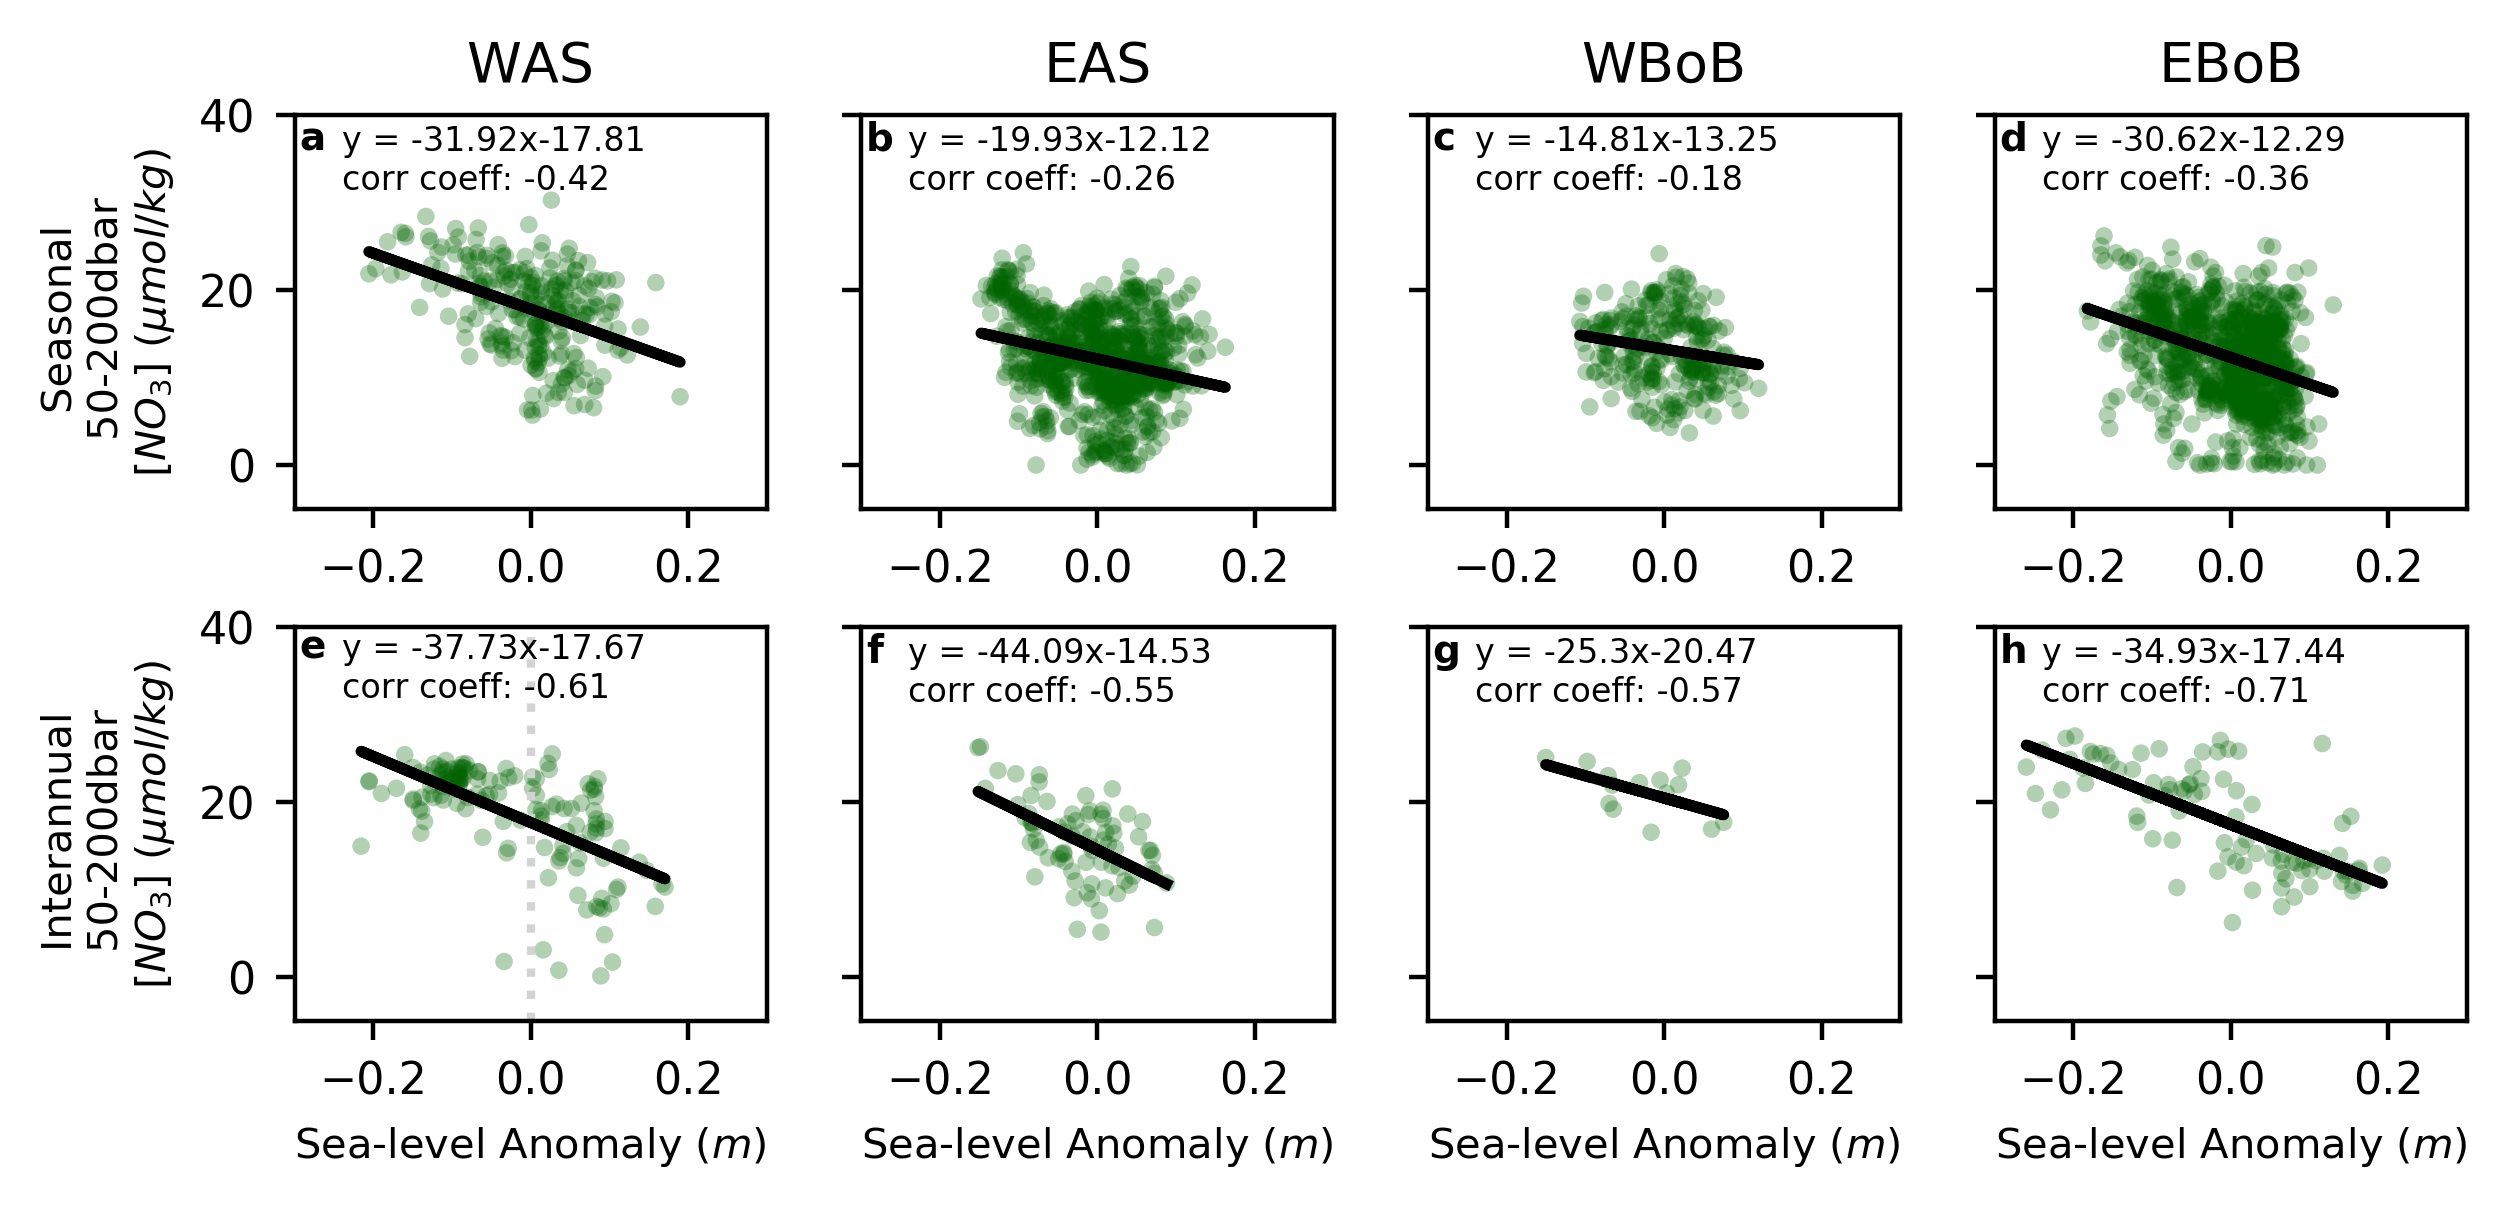

In [79]:
depth = '50_200'
Depth = '50-200'

nitrate_wAS = ds_WOA['nitrate_wAS_' + depth]
nitrate_eAS = ds_WOA['nitrate_eAS_' + depth]
nitrate_wBoB = ds_WOA['nitrate_wBoB_' + depth]
nitrate_eBoB = ds_WOA['nitrate_eBoB_' + depth]

sla_wAS = ds_SLA['sla_wAS']
sla_eAS = ds_SLA['sla_eAS']
sla_wBoB = ds_SLA['sla_wBoB']
sla_eBoB = ds_SLA['sla_eBoB']

nitrate_wAS_ia = ds_WOD['nitrate_wAS_' + depth]
nitrate_eAS_ia = ds_WOD['nitrate_eAS_' + depth]
nitrate_wBoB_ia = ds_WOD['nitrate_wBoB_' + depth]
nitrate_eBoB_ia = ds_WOD['nitrate_eBoB_' + depth]

sla_wAS_ia = ds_SLA_ia['sla_wAS']
sla_eAS_ia = ds_SLA_ia['sla_eAS']
sla_wBoB_ia = ds_SLA_ia['sla_wBoB']
sla_eBoB_ia = ds_SLA_ia['sla_eBoB']

##############################################################
fig = plt.figure(figsize=(17.8 / 2.54,3),dpi=400)

sz = 10
fsz = 6
lfz = 7
lw = 2
alpha = 0.3


xlim = [-0.3,0.3]
ylim = [-5,40]

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
cmap = plt.cm.viridis

sp_clr = 'darkgreen'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 8,
         'axes.labelsize': 7.5,
         'axes.titlesize': 10,
         'xtick.labelsize':8,
         'ytick.labelsize':8}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(241)
ind = np.isnan(sla_wAS) | np.isnan(nitrate_wAS)
p = ax.scatter(sla_wAS[~ind],nitrate_wAS[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_wAS[~ind],nitrate_wAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS[~ind],nitrate_wAS[~ind])
print(p_val,r)
ax.plot(sla_wAS[~ind], m*sla_wAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('WAS')
ax.set_ylabel('Seasonal \n' + Depth + 'dbar \n[$NO_3$] ($\mu mol/ kg$)')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'a', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
  
ax = fig.add_subplot(242)
ind = np.isnan(sla_eAS) | np.isnan(nitrate_eAS)
p = ax.scatter(sla_eAS[~ind],nitrate_eAS[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_eAS[~ind],nitrate_eAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS[~ind],nitrate_eAS[~ind])
print(p_val,r)
ax.plot(sla_eAS[~ind], m*sla_eAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EAS')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'b', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
 
ax = fig.add_subplot(243)
ind = np.isnan(sla_wBoB) | np.isnan(nitrate_wBoB)
p = ax.scatter(sla_wBoB[~ind],nitrate_wBoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB[~ind],nitrate_wBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB[~ind],nitrate_wBoB[~ind])
print(p_val,r)
ax.plot(sla_wBoB[~ind], m*sla_wBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('WBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
   
ax = fig.add_subplot(244)
ind = np.isnan(sla_eBoB) | np.isnan(nitrate_eBoB)
p = ax.scatter(sla_eBoB[~ind],nitrate_eBoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eBoB[~ind],nitrate_eBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB[~ind],nitrate_eBoB[~ind])
print(p_val,r)
ax.plot(sla_eBoB[~ind], m*sla_eBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'd', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
  
#-------------------------------------------------------------

ax = fig.add_subplot(245)
ind = np.isnan(sla_wAS_ia) | np.isnan(nitrate_wAS_ia)
ax.scatter(sla_wAS_ia[~ind],nitrate_wAS_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wAS_ia[~ind], nitrate_wAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS_ia[~ind],nitrate_wAS_ia[~ind])
print(p_val,r)
ax.plot(sla_wAS_ia[~ind], m*sla_wAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('Interannual \n' + Depth + 'dbar \n[$NO_3$] ($\mu mol/ kg$)')
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'e', x = 0.01,y=0.92, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.82, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.72, fontsize = fsz)
       
ax = fig.add_subplot(246)
ind = np.isnan(sla_eAS_ia) | np.isnan(nitrate_eAS_ia)
ax.scatter(sla_eAS_ia[~ind],nitrate_eAS_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eAS_ia[~ind], nitrate_eAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS_ia[~ind],nitrate_eAS_ia[~ind])
print(p_val,r)
ax.plot(sla_eAS_ia[~ind], m*sla_eAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'f', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
    
ax = fig.add_subplot(247)
ind = np.isnan(sla_wBoB_ia) | np.isnan(nitrate_wBoB_ia)
ax.scatter(sla_wBoB_ia[~ind],nitrate_wBoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB_ia[~ind], nitrate_wBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB_ia[~ind],nitrate_wBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_wBoB_ia[~ind], m*sla_wBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'g', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
   
ax = fig.add_subplot(248)
ind = np.isnan(sla_eBoB_ia) | np.isnan(nitrate_eBoB_ia)
ax.scatter(sla_eBoB_ia[~ind],nitrate_eBoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eBoB_ia[~ind], nitrate_eBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB_ia[~ind],nitrate_eBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_eBoB_ia[~ind], m*sla_eBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'h', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
  
plt.subplots_adjust(hspace = 0.3)

plt.savefig(figpath + 'nitrate_sla_corr_' + depth + '.pdf', format='pdf', dpi = 400)




# Phosphate vs SLA

2.50267947580304e-20 -0.538228895152644
2.502679475803227e-20 -0.5382288951526436
8.238622855107706e-59 -0.508605605098582
8.238622855106717e-59 -0.5086056050985818
1.568924654934552e-09 -0.3606882878841599
1.5689246549345542e-09 -0.3606882878841602
2.7900804738139155e-17 -0.2533626173872655
2.7900804738100174e-17 -0.2533626173872655
7.971685250743861e-13 -0.6321706582873803
7.971685250743832e-13 -0.6321706582873804
1.2654343898392909e-07 -0.711681774448696
1.2654343898393205e-07 -0.7116817744486956
0.9802574357446316 0.031006576935594155
0.9802574357446318 0.031006576935594138


TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

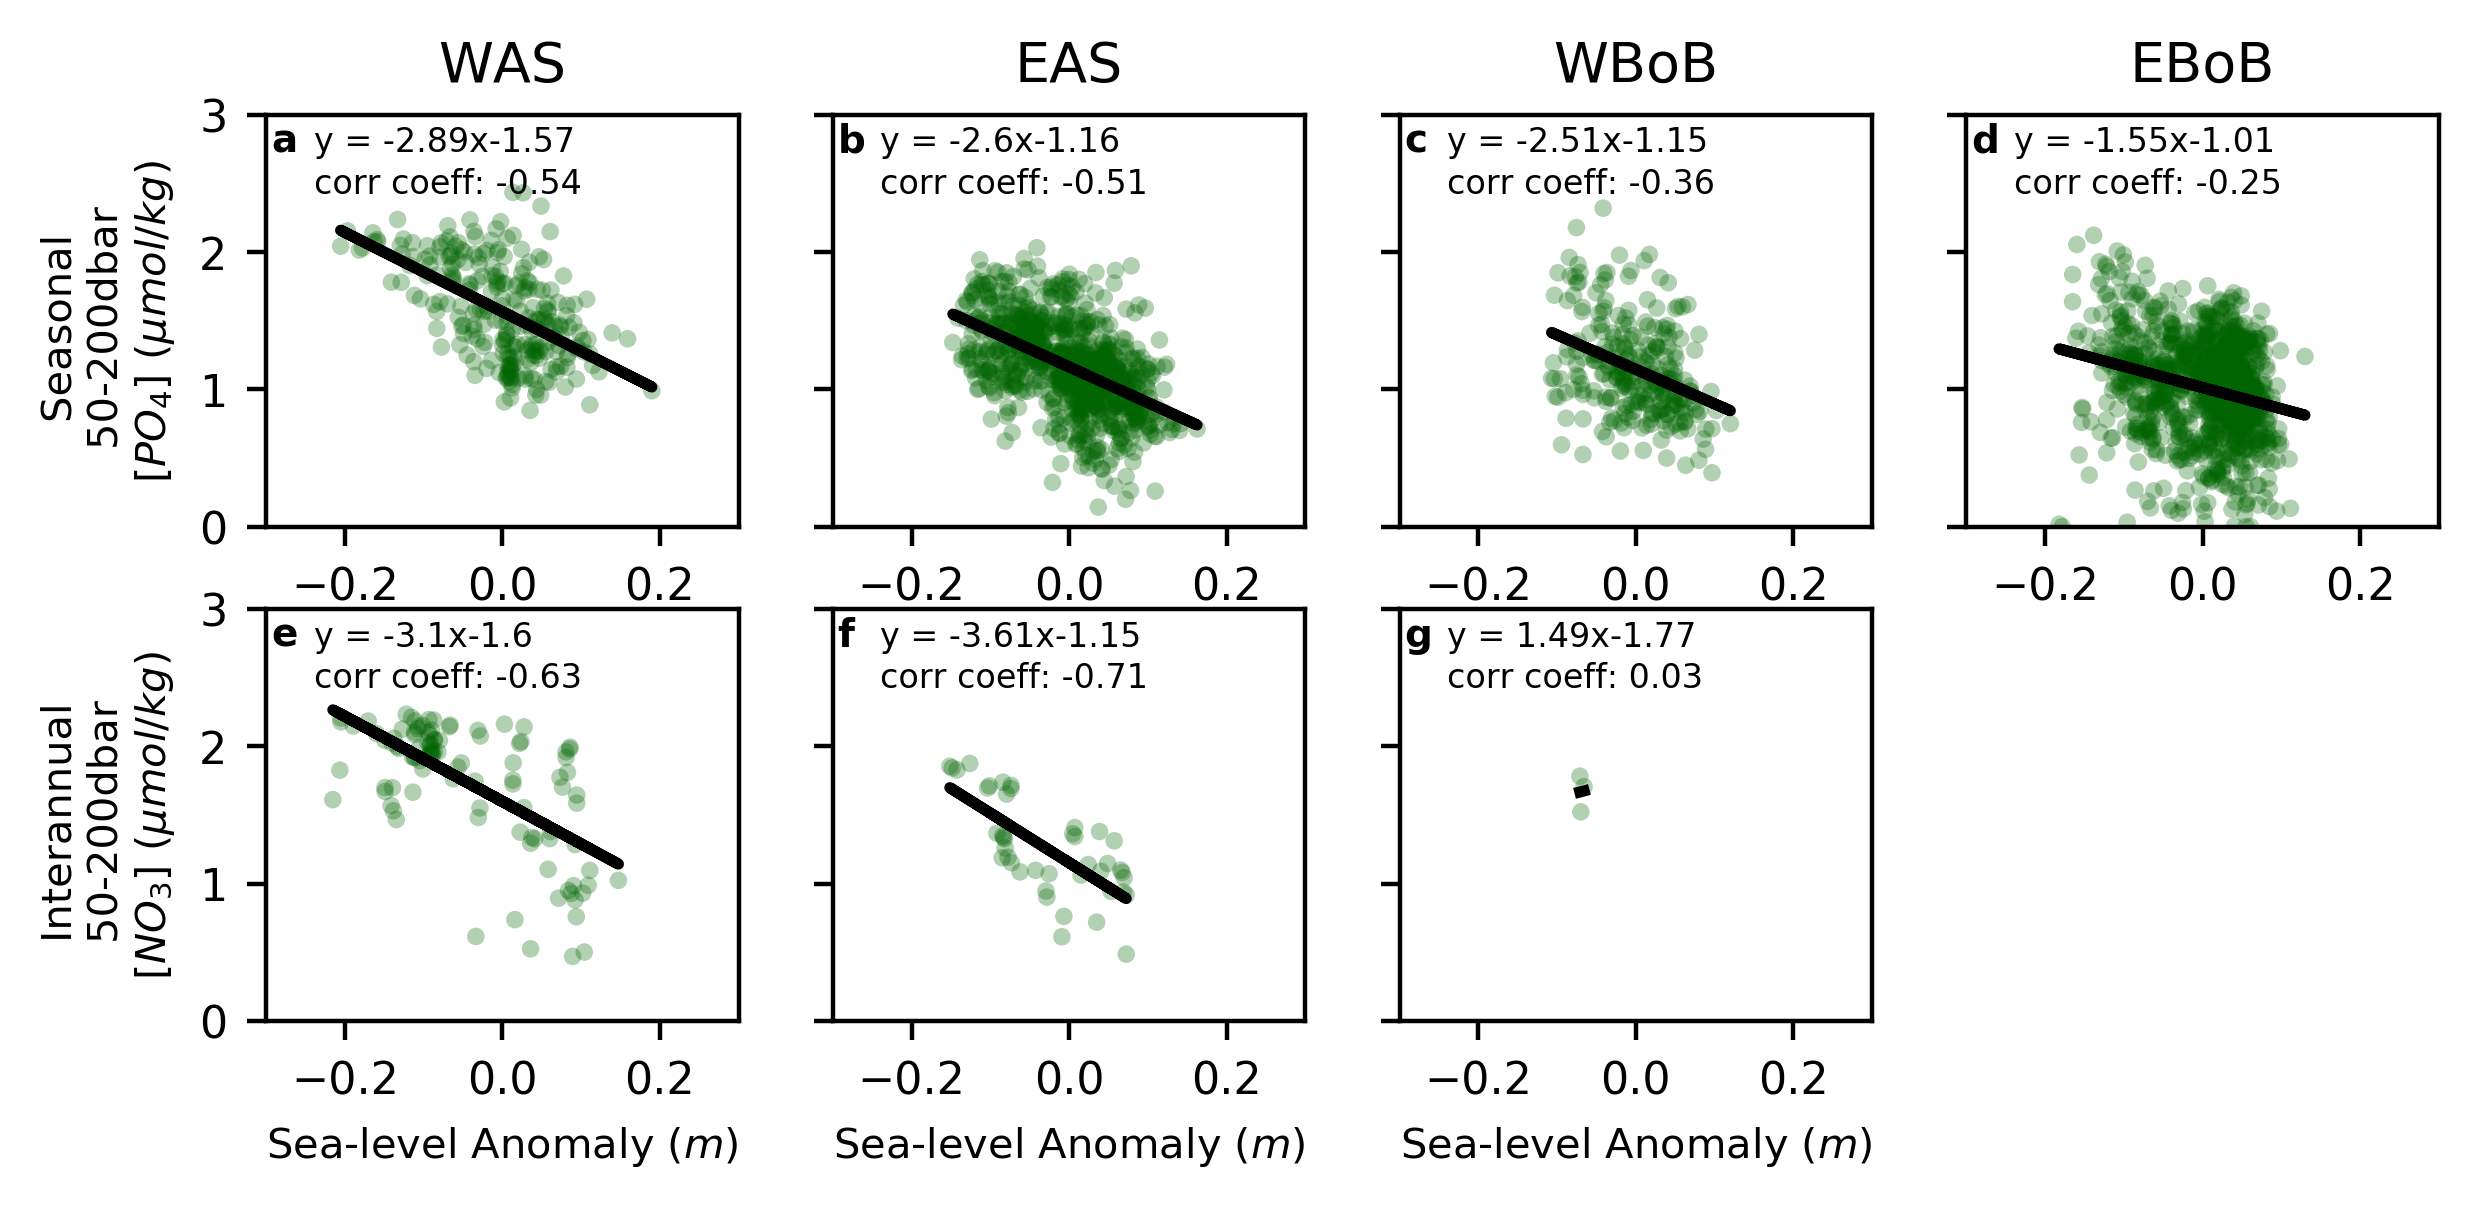

In [83]:
depth = '50_200'
Depth = '50-200'

phosphate_wAS = ds_WOA['phosphate_wAS_' + depth]
phosphate_eAS = ds_WOA['phosphate_eAS_' + depth]
phosphate_wBoB = ds_WOA['phosphate_wBoB_' + depth]
phosphate_eBoB = ds_WOA['phosphate_eBoB_' + depth]

sla_wAS = ds_SLA['sla_wAS']
sla_eAS = ds_SLA['sla_eAS']
sla_wBoB = ds_SLA['sla_wBoB']
sla_eBoB = ds_SLA['sla_eBoB']

phosphate_wAS_ia = ds_WOD['phosphate_wAS_' + depth]
phosphate_eAS_ia = ds_WOD['phosphate_eAS_' + depth]
phosphate_wBoB_ia = ds_WOD['phosphate_wBoB_' + depth]
phosphate_eBoB_ia = ds_WOD['phosphate_eBoB_' + depth]

sla_wAS_ia = ds_SLA_ia['sla_wAS']
sla_eAS_ia = ds_SLA_ia['sla_eAS']
sla_wBoB_ia = ds_SLA_ia['sla_wBoB']
sla_eBoB_ia = ds_SLA_ia['sla_eBoB']

##############################################################
fig = plt.figure(figsize=(17.8 / 2.54,3),dpi=400)

sz = 10
fsz = 6
lfz = 7
lw = 2
alpha = 0.3


xlim = [-0.3,0.3]
ylim = [0,3]

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
cmap = plt.cm.viridis

sp_clr = 'darkgreen'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 8,
         'axes.labelsize': 7.5,
         'axes.titlesize': 10,
         'xtick.labelsize':8,
         'ytick.labelsize':8}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(241)
ind = np.isnan(sla_wAS) | np.isnan(phosphate_wAS)
p = ax.scatter(sla_wAS[~ind],phosphate_wAS[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_wAS[~ind],phosphate_wAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS[~ind],phosphate_wAS[~ind])
print(p_val,r)
ax.plot(sla_wAS[~ind], m*sla_wAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('WAS')
ax.set_ylabel('Seasonal \n' + Depth + 'dbar \n[$PO_4$] ($\mu mol/ kg$)')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'a', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
     
ax = fig.add_subplot(242)
ind = np.isnan(sla_eAS) | np.isnan(phosphate_eAS)
p = ax.scatter(sla_eAS[~ind],phosphate_eAS[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_eAS[~ind],phosphate_eAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS[~ind],phosphate_eAS[~ind])
print(p_val,r)
ax.plot(sla_eAS[~ind], m*sla_eAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EAS')
# ax.set_xlabel('Seasonal SLA ($m$)')
add_letter(ax, 'b', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
  
ax = fig.add_subplot(243)
ind = np.isnan(sla_wBoB) | np.isnan(phosphate_wBoB)
p = ax.scatter(sla_wBoB[~ind],phosphate_wBoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB[~ind],phosphate_wBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB[~ind],phosphate_wBoB[~ind])
print(p_val,r)
ax.plot(sla_wBoB[~ind], m*sla_wBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('WBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
 
ax = fig.add_subplot(244)
ind = np.isnan(sla_eBoB) | np.isnan(phosphate_eBoB)
p = ax.scatter(sla_eBoB[~ind],phosphate_eBoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eBoB[~ind],phosphate_eBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB[~ind],phosphate_eBoB[~ind])
print(p_val,r)
ax.plot(sla_eBoB[~ind], m*sla_eBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EBoB')
# ax.set_xlabel('Seasonal SLA ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'd', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
      
#-------------------------------------------------------------

ax = fig.add_subplot(245)
ind = np.isnan(sla_wAS_ia) | np.isnan(phosphate_wAS_ia)
ax.scatter(sla_wAS_ia[~ind],phosphate_wAS_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wAS_ia[~ind], phosphate_wAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wAS_ia[~ind],phosphate_wAS_ia[~ind])
print(p_val,r)
ax.plot(sla_wAS_ia[~ind], m*sla_wAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('Interannual \n' + Depth + 'dbar \n[$NO_3$] ($\mu mol/ kg$)')
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'e', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
        
ax = fig.add_subplot(246)
ind = np.isnan(sla_eAS_ia) | np.isnan(phosphate_eAS_ia)
ax.scatter(sla_eAS_ia[~ind],phosphate_eAS_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eAS_ia[~ind], phosphate_eAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eAS_ia[~ind],phosphate_eAS_ia[~ind])
print(p_val,r)
ax.plot(sla_eAS_ia[~ind], m*sla_eAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'f', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
 
ax = fig.add_subplot(247)
ind = np.isnan(sla_wBoB_ia) | np.isnan(phosphate_wBoB_ia)
ax.scatter(sla_wBoB_ia[~ind],phosphate_wBoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB_ia[~ind], phosphate_wBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB_ia[~ind],phosphate_wBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_wBoB_ia[~ind], m*sla_wBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'g', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
  
ax = fig.add_subplot(248)
ind = np.isnan(sla_eBoB_ia) | np.isnan(phosphate_eBoB_ia)
ax.scatter(sla_eBoB_ia[~ind],phosphate_eBoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
# ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_eBoB_ia[~ind],phosphate_eBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_eBoB_ia[~ind],phosphate_eBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_eBoB_ia[~ind], m*sla_eBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Sea-level Anomaly ($m$)')
add_letter(ax, 'h', x = 0.01,y=0.91, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.81, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.71, fontsize = fsz)
  
plt.subplots_adjust(hspace = 0.3)

plt.savefig(figpath + 'phosphate_sla_corr_' + depth + '.pdf', format='pdf', dpi = 400)





# Temperature vs Doxy

In [ ]:
depth = '50_200'
Depth = '50-200'

doxy_wAS = ds_WOA['doxy_wAS_' + depth]
doxy_eAS = ds_WOA['doxy_eAS_' + depth]
doxy_wBoB = ds_WOA['doxy_wBoB_' + depth]
doxy_eBoB = ds_WOA['doxy_eBoB_' + depth]

temp_wAS = ds_WOA['temp_wAS_' + depth]
temp_eAS = ds_WOA['temp_eAS_' + depth]
temp_wBoB = ds_WOA['temp_wBoB_' + depth]
temp_eBoB = ds_WOA['temp_eBoB_' + depth]

doxy_wAS_ia = ds_WOD['doxy_wAS_' + depth]
doxy_eAS_ia = ds_WOD['doxy_eAS_' + depth]
doxy_wBoB_ia = ds_WOD['doxy_wBoB_' + depth]
doxy_eBoB_ia = ds_WOD['doxy_eBoB_' + depth]

temp_wAS_ia = ds_WOD['temp_wAS_' + depth]
temp_eAS_ia = ds_WOD['temp_eAS_' + depth]
temp_wBoB_ia = ds_WOD['temp_wBoB_' + depth]
temp_eBoB_ia = ds_WOD['temp_eBoB_' + depth]

##############################################################
fig = plt.figure(figsize=(17.8 / 2.54,3),dpi=400)

sz = 10
fsz = 6
lfz = 7
lw = 2
alpha = 0.3


xlim = [14,34]
ylim = [-20,300]

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
cmap = plt.cm.viridis

sp_clr = 'darkgreen'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 8,
         'axes.labelsize': 7.5,
         'axes.titlesize': 10,
         'xtick.labelsize':8,
         'ytick.labelsize':8}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(241)
ind = np.isnan(temp_wAS) | np.isnan(doxy_wAS)
p = ax.scatter(temp_wAS[~ind],doxy_wAS[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(temp_wAS[~ind],doxy_wAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_wAS[~ind],doxy_wAS[~ind])
print(p_val,r)
ax.plot(temp_wAS[~ind], m*temp_wAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('WAS')
ax.set_ylabel('Seasonal \n' + Depth + 'dbar \n[$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('Seasonal \n' + Depth + 'dbar \nTemperature ($^\circ C$)')
add_letter(ax, 'a', x = 0.01,y=0.92, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.82, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.72, fontsize = fsz)
      
ax = fig.add_subplot(242)
ind = np.isnan(temp_eAS) | np.isnan(doxy_eAS)
p = ax.scatter(temp_eAS[~ind],doxy_eAS[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(temp_eAS[~ind],doxy_eAS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_eAS[~ind],doxy_eAS[~ind])
print(p_val,r)
ax.plot(temp_eAS[~ind], m*temp_eAS[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EAS')
ax.set_xlabel('Seasonal \n' + Depth + 'dbar \nTemperature ($^\circ C$)')
add_letter(ax, 'b', x = 0.01,y=0.92, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.82, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.72, fontsize = fsz)
    
ax = fig.add_subplot(243)
ind = np.isnan(temp_wBoB) | np.isnan(doxy_wBoB)
p = ax.scatter(temp_wBoB[~ind],doxy_wBoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_wBoB[~ind],doxy_wBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_wBoB[~ind],doxy_wBoB[~ind])
print(p_val,r)
ax.plot(temp_wBoB[~ind], m*temp_wBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('WBoB')
ax.set_xlabel('Seasonal \n' + Depth + 'dbar \nTemperature ($^\circ C$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.92, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.82, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.72, fontsize = fsz)
    
ax = fig.add_subplot(244)
ind = np.isnan(temp_eBoB) | np.isnan(doxy_eBoB)
p = ax.scatter(temp_eBoB[~ind],doxy_eBoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_eBoB[~ind],doxy_eBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_eBoB[~ind],doxy_eBoB[~ind])
print(p_val,r)
ax.plot(temp_eBoB[~ind], m*temp_eBoB[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_title('EBoB')
ax.set_xlabel('Seasonal \n' + Depth + 'dbar \nTemperature ($^\circ C$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'd', x = 0.01,y=0.92, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.82, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.72, fontsize = fsz)
       
#-------------------------------------------------------------

ax = fig.add_subplot(245)
ind = np.isnan(temp_wAS_ia) | np.isnan(doxy_wAS_ia)
ax.scatter(temp_wAS_ia[~ind],doxy_wAS_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_wAS_ia[~ind], doxy_wAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_wAS_ia[~ind],doxy_wAS_ia[~ind])
print(p_val,r)
ax.plot(temp_wAS_ia[~ind], m*temp_wAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('Interannual \n' + Depth + 'dbar \n[$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('Interannual \n' + Depth + 'dbar \nTemperature ($^\circ C$)')
add_letter(ax, 'e', x = 0.01,y=0.92, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.82, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.72, fontsize = fsz)
       
ax = fig.add_subplot(246)
ind = np.isnan(temp_eAS_ia) | np.isnan(doxy_eAS_ia)
ax.scatter(temp_eAS_ia[~ind],doxy_eAS_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_eAS_ia[~ind], doxy_eAS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_eAS_ia[~ind],doxy_eAS_ia[~ind])
print(p_val,r)
ax.plot(temp_eAS_ia[~ind], m*temp_eAS_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Interannual \n' + Depth + 'dbar \nTemperature ($^\circ C$)')
add_letter(ax, 'f', x = 0.01,y=0.92, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.82, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.72, fontsize = fsz)
       
ax = fig.add_subplot(247)
ind = np.isnan(temp_wBoB_ia) | np.isnan(doxy_wBoB_ia)
ax.scatter(temp_wBoB_ia[~ind],doxy_wBoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_wBoB_ia[~ind], doxy_wBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_wBoB_ia[~ind],doxy_wBoB_ia[~ind])
print(p_val,r)
ax.plot(temp_wBoB_ia[~ind], m*temp_wBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Interannual \n' + Depth + 'dbar \nTemperature ($^\circ C$)')
add_letter(ax, 'g', x = 0.01,y=0.92, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.82, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.72, fontsize = fsz)
       
ax = fig.add_subplot(248)
ind = np.isnan(temp_eBoB_ia) | np.isnan(doxy_eBoB_ia)
ax.scatter(temp_eBoB_ia[~ind],doxy_eBoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_eBoB_ia[~ind], doxy_eBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_eBoB_ia[~ind],doxy_eBoB_ia[~ind])
print(p_val,r)
ax.plot(temp_eBoB_ia[~ind], m*temp_eBoB_ia[~ind] + b, 'k', linewidth = lw)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_yticklabels([])
ax.set_xlabel('Interannual \n' + Depth + 'dbar \nTemperature ($^\circ C$)')
add_letter(ax, 'h', x = 0.01,y=0.92, fontsize = lfz)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.1,y=0.82, fontsize = fsz)
if p_val >  0.05:
    add_text(ax, 'p-value: ' + np.round(str(p_val),4), x = 0.1,y=0.72, fontsize = fsz)
     
plt.subplots_adjust(hspace = 0.3)

plt.savefig(figpath + 'doxy_temp_corr_' + depth + '.pdf', format='pdf', dpi = 400)



# Spatial Map of Points Used for Correlations

In [ ]:
depth = '50_200'
Depth = '50-200'

doxy_wAS_ia = ds_WOD['doxy_wAS_' + depth]
doxy_eAS_ia = ds_WOD['doxy_eAS_' + depth]
doxy_wBoB_ia = ds_WOD['doxy_wBoB_' + depth]
doxy_eBoB_ia = ds_WOD['doxy_eBoB_' + depth]

temp_wAS_ia = ds_WOD['temp_wAS_' + depth]
temp_eAS_ia = ds_WOD['temp_eAS_' + depth]
temp_wBoB_ia = ds_WOD['temp_wBoB_' + depth]
temp_eBoB_ia = ds_WOD['temp_eBoB_' + depth]

sla_wAS_ia = ds_SLA_ia['sla_wAS']
sla_eAS_ia = ds_SLA_ia['sla_eAS']
sla_wBoB_ia = ds_SLA_ia['sla_wBoB']
sla_eBoB_ia = ds_SLA_ia['sla_eBoB']

lat_wAS_ia = ds_SLA_ia['lat_wAS']
lat_eAS_ia = ds_SLA_ia['lat_eAS']
lat_wBoB_ia = ds_SLA_ia['lat_wBoB']
lat_eBoB_ia = ds_SLA_ia['lat_eBoB']

lon_wAS_ia = ds_SLA_ia['lon_wAS']
lon_eAS_ia = ds_SLA_ia['lon_eAS']
lon_wBoB_ia = ds_SLA_ia['lon_wBoB']
lon_eBoB_ia = ds_SLA_ia['lon_eBoB']

##############################################################
fig = plt.figure(figsize=(17.8/2.54,4),dpi=400)

sz = 1
sq_sz = 60
fsz = 12
alpha = 0.25


sp_clr = 'purple'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 14,
         'axes.labelsize': 15,
         'axes.titlesize': 18,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)

##############################################################
ax = fig.add_subplot(141,projection= ccrs.PlateCarree())
ind = np.isnan(sla_wAS_ia) | np.isnan(temp_wAS_ia)
p = ax.scatter(lon_wAS_ia[~ind],lat_wAS_ia[~ind], c='k', s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_eAS_ia) | np.isnan(temp_eAS_ia)
p = ax.scatter(lon_eAS_ia[~ind],lat_eAS_ia[~ind], c='g', s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_wBoB_ia) | np.isnan(temp_wBoB_ia)
p = ax.scatter(lon_wBoB_ia[~ind],lat_wBoB_ia[~ind], c='b', s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_eBoB_ia) | np.isnan(temp_eBoB_ia)
p = ax.scatter(lon_eBoB_ia[~ind],lat_eBoB_ia[~ind], c='darkpurple', s = sz,transform=ccrs.PlateCarree())
ax.set_title('Temperature & SLA Obs')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'a', x = 0.01,y=0.94)

ax = fig.add_subplot(132,projection= ccrs.PlateCarree())
ind = np.isnan(sla_wAS_ia) | np.isnan(doxy_wAS_ia)
p = ax.scatter(lon_wAS_ia[~ind],lat_wAS_ia[~ind], c='k', s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_eAS_ia) | np.isnan(doxy_eAS_ia)
p = ax.scatter(lon_eAS_ia[~ind],lat_eAS_ia[~ind], c='g', s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_wBoB_ia) | np.isnan(doxy_wBoB_ia)
p = ax.scatter(lon_wBoB_ia[~ind],lat_wBoB_ia[~ind], c='b', s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_eBoB_ia) | np.isnan(doxy_eBoB_ia)
lep = ax.scatter(lon_eBoB_ia[~ind],lat_eBoB_ia[~ind], c='darkpurple', s = sz,transform=ccrs.PlateCarree())
ax.set_title('Oxygen & SLA Obs')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'b', x = 0.01,y=0.94)

ax = fig.add_subplot(133,projection= ccrs.PlateCarree())
ind = np.isnan(doxy_wAS_ia) | np.isnan(temp_wAS_ia)
p = ax.scatter(lon_wAS_ia[~ind],lat_wAS_ia[~ind], c='k', s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(doxy_eAS_ia) | np.isnan(temp_eAS_ia)
p = ax.scatter(lon_eAS_ia[~ind],lat_eAS_ia[~ind], c='g', s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(doxy_wBoB_ia) | np.isnan(temp_wBoB_ia)
p = ax.scatter(lon_wBoB_ia[~ind],lat_wBoB_ia[~ind], c='b', s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(doxy_eBoB_ia) | np.isnan(temp_eBoB_ia)
p = ax.scatter(lon_eBoB_ia[~ind],lat_eBoB_ia[~ind], c='darkpurple', s = sz,transform=ccrs.PlateCarree())
ax.set_title('Temperature & Oxygen Obs')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'c', x = 0.01,y=0.94)
plt.subplots_adjust(hspace = 0.25, wspace = 0.23)

savefig(figpath + 'doxy_temp_sla_loc_map_' + depth + '.pdf', format='pdf', dpi = 400)